# 9 GLMのベイズモデル化と事後分布の推定

In [24]:
using CSV
using DataFrames
using GLM
using LaTeXStrings
using Plots

In [20]:
df = CSV.read("data/section9.csv");

In [21]:
df

,x,y
,Float64⍰,Int64⍰
1,3.0,5
2,3.21053,3
3,3.42105,6
4,3.63158,7
5,3.84211,7
6,4.05263,5
7,4.26316,9
8,4.47368,9
9,4.68421,7


## 9.1 例題 : 種子数のポアソン回帰 (個体差なし)

In [22]:
glm_model = glm(@formula(y ~ x), df, Poisson())

StatsModels.DataFrameRegressionModel{GeneralizedLinearModel{GlmResp{Array{Float64,1},Poisson{Float64},LogLink},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: y ~ 1 + x

Coefficients:
              Estimate Std.Error z value Pr(>|z|)
(Intercept)    1.56606  0.359949 4.35077    <1e-4
x            0.0833412 0.0683847 1.21871   0.2230


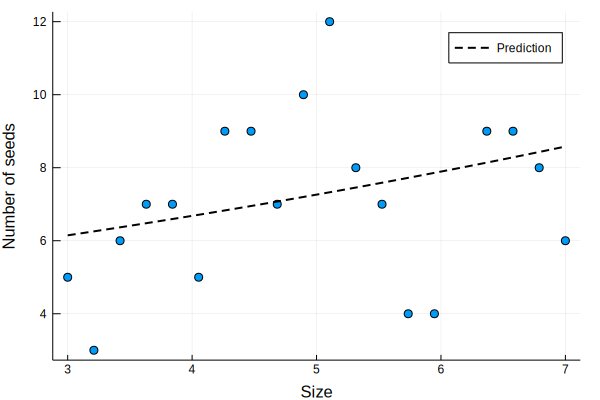

In [26]:
scatter(df.x, df.y, label="", xlabel="Size", ylabel="Number of seeds")
xs = 3:0.1:7
xx = DataFrame(x=xs)
plot!(xs, predict(glm_model, xx), label="Prediction", linewidth=2, 
    linestyle=:dash, linecolor = :black)